## Procesamiento Digital de Imagenes - TP4

### Functions and libraries

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Amplitude and phase limits

In [ ]:
max_amp = 11.76
min_amp = -5.59
min_phase = -1 * np.pi
max_phase = np.pi

Functions

In [ ]:
def scale_and_8bits_amp(array):
  scaled_array = ( ( array - min_amp ) / ( max_amp - min_amp ) )*255
  return scaled_array.astype('uint8')

In [ ]:
def scale_and_8bits_phase(array):
  scaled_array = ( ( array -  min_phase) / ( max_phase - min_phase ) )*255
  return scaled_array.astype('uint8')

In [ ]:
def rescale_and_float_amp(array):
  amp_float = amp8.astype('float64')
  return np.exp( ((amp_float/255) * (max_amp - min_amp)) + min_amp )

In [ ]:
def rescale_and_float_phase(array):
  phase_float = phase8.astype('float64')
  return ((phase_float/255) * (max_phase - min_phase)) + min_phase

### FFT amplitude and phase

In [ ]:
def fft2_ap(image):
  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))
  image_fft_magnitude = np.abs(shifted_image_fft)
  image_fft_phase = np.angle(shifted_image_fft)
  return image_fft_magnitude, image_fft_phase

### Compute IFFT



In [ ]:
def ifft2_ap(amp, phase):
  fft_image = amp*np.cos(phase) + amp*1j*np.sin(phase)
  return np.abs(np.fft.ifft2( fft_image ))

### To 8 bits

In [ ]:
def ap_to_8bit(amp, phase):
  # Converting amplitude to log scale
  return scale_and_8bits_amp(np.log(amp)), scale_and_8bits_phase(phase)

### From 8 bits

In [ ]:
def ap_from_8bit(amp8, phase8):
  return rescale_and_float_amp(amp8), rescale_and_float_phase(phase8)

### Resample

In [ ]:
def upsampling(image, shape):
  nrow = np.round((shape[0] - image.shape[0])/2).astype('int')
  ncol = np.round((shape[1] - image.shape[1])/2).astype('int')

  FT = np.fft.fftshift(np.fft.fft2(image))

  FT_array = np.array(FT)
  padded_FT_array = np.pad(FT_array,(nrow, ncol),'constant')

  return np.abs(np.fft.ifft2(padded_FT_array))

In [ ]:
def downsampling(image, shape):
  FT = np.fft.fftshift(np.fft.fft2(image))

  FT_array = np.array(FT)

  nrow_min = int((image.shape[0] - shape[0])/2)
  nrow_max = int((image.shape[0] + shape[0])/2)
  ncol_min = int((image.shape[1] - shape[1])/2)
  ncol_max = int((image.shape[1] + shape[1])/2)

  cutted_FT_array = FT_array[nrow_min:nrow_max, ncol_min:ncol_max]

  return np.abs(np.fft.ifft2(cutted_FT_array))

In [ ]:
def fft_resample(image, shape):
  if shape[0] > image.shape[0]:
    return upsampling(image, shape)
  if shape[0] < image.shape[0]:
    return downsampling(image, shape)

### Starting snippet

Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (136 kB)
Downloading: 8192/139512 bytes (5.9%)139512/139512 bytes (100.0%)
  Done
File saved as /root/.imageio/images/camera.png.


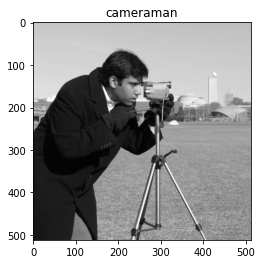

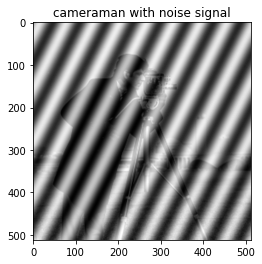

In [ ]:
im = imageio.imread('imageio:camera.png')/255.
plt.imshow(im,'gray')
plt.title('cameraman')
plt.show()

im_noisy = imageio.imread('test_excercise4.png')/255.
plt.imshow(im_noisy,'gray')
plt.title('cameraman with noise signal')
plt.show()

### compute amplitude and phase

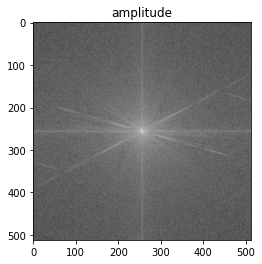

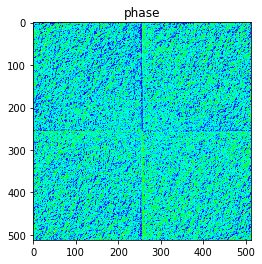

In [ ]:
amp, phase = fft2_ap(im)
plt.imshow(np.log(amp), 'gray')
plt.title('amplitude')
plt.show()

plt.imshow(phase, 'hsv')
plt.title('phase')
plt.show()

### back-transform

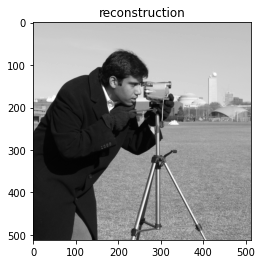

In [ ]:
rec = ifft2_ap(amp, phase)
plt.imshow(rec,'gray')
plt.title('reconstruction')
plt.show()

### to 8 bit and reconstruction

uint8 uint8


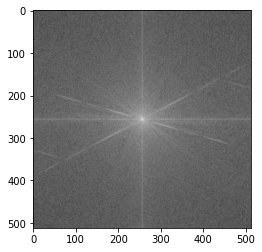

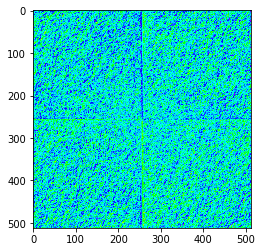

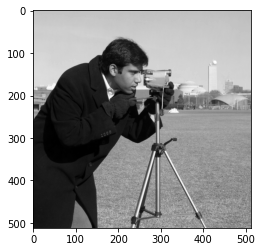

In [ ]:
amp8, phase8 = ap_to_8bit(*fft2_ap(im))
print(amp8.dtype, phase8.dtype)
plt.imshow(amp8,'gray')
plt.show()

plt.imshow(phase8, 'hsv')
plt.show()

im2 = ifft2_ap(*ap_from_8bit(amp8,phase8))
plt.imshow(im2, 'gray')
plt.show()

In a real application, i have to be careful in the dynamic range for the amplitude that i choose. But in this case, i select one according the cameraman image.

<h4>Error analysis (RMSE)</h4>

In [ ]:
np.sqrt(np.mean((im2-im)**2))

0.01910990087022669

The recovered image is recognizable, but its not equal the original. This is the cause of the RMSE value.

### remove peaks of sine wave

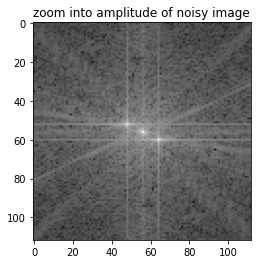

In [ ]:
amp_noisy = fft2_ap(im_noisy)[0]
plt.imshow(np.log(amp_noisy[200:-200,200:-200]),'gray')
plt.title('zoom into amplitude of noisy image')
plt.show()

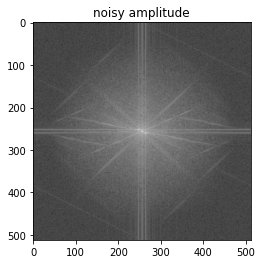

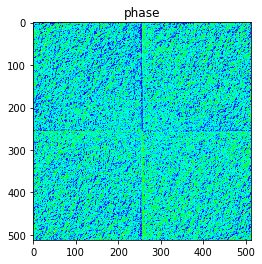

In [ ]:
amp_noisy, phase_noisy = fft2_ap(im_noisy)
plt.imshow(np.log(amp_noisy), 'gray')
plt.title('noisy amplitude')
plt.show()

plt.imshow(phase, 'hsv')
plt.title('phase')
plt.show()

Converting to 8 bits the amplitude and phase

uint8 uint8


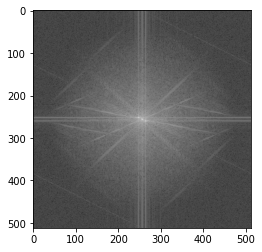

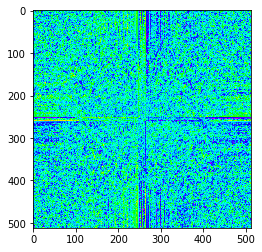

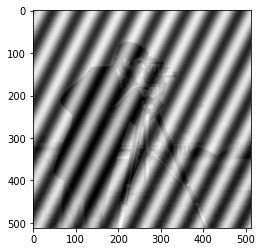

In [ ]:
amp8, phase8 = ap_to_8bit(*fft2_ap(im_noisy))
print(amp8.dtype, phase8.dtype)
plt.imshow(amp8,'gray')
plt.show()

plt.imshow(phase8, 'hsv')
plt.show()

im2 = ifft2_ap(*ap_from_8bit(amp8,phase8))
plt.imshow(im2, 'gray')
plt.show()

In [ ]:
imageio.imwrite('test_excercise4_amp.png', amp8)
imageio.imwrite('test_excercise4_phase.png', phase8)

Fixed amplitude and same phase

In [ ]:
amp8 = imageio.imread('test_excercise4_amp_fix.png')
phase8 = imageio.imread('test_excercise4_phase.png')

In [ ]:
amp8 = np.dot(amp8[...,:3], [0.2989, 0.5870, 0.1140])

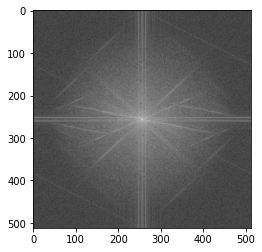

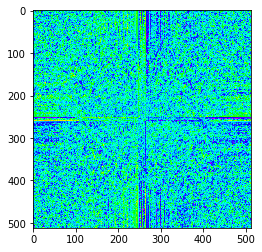

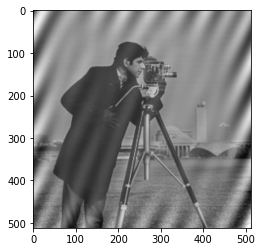

In [ ]:
plt.imshow(amp8,'gray')
plt.show()

plt.imshow(phase8, 'hsv')
plt.show()

im2 = ifft2_ap(*ap_from_8bit(amp8,phase8))
plt.imshow(im2, 'gray')
plt.show()

In [ ]:
imageio.imwrite('test_excercise4_fixed_image.png', (im2 * 255).astype(np.uint8))

### resample

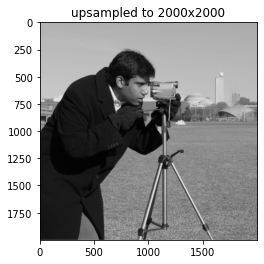

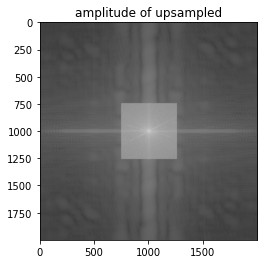

In [ ]:
upsampled = fft_resample(im,(2000,2000))
plt.imshow(upsampled,'gray')
plt.title('upsampled to 2000x2000')
plt.show()

plt.imshow(np.log(fft2_ap(upsampled)[0]),'gray')
plt.title('amplitude of upsampled')
plt.show()

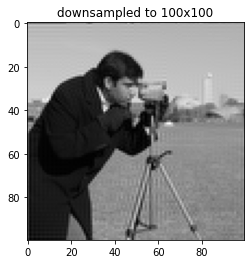

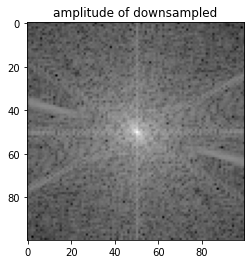

In [ ]:
downsampled = fft_resample(im,(100,100))
plt.imshow(downsampled,'gray')
plt.title('downsampled to 100x100')
plt.show()

plt.imshow(np.log(fft2_ap(downsampled)[0]),'gray')
plt.title('amplitude of downsampled')
plt.show()